In [1]:
pip install pandas matplotlib seaborn scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd


df = pd.read_csv('data/Day3 Data/Reviews-1.csv')
df = pd.read_csv('data/Day3 Data/Reviews-2.csv')
df = pd.read_csv('data/Day3 Data/Reviews-3.csv')
df = pd.read_csv('data/Day3 Data/Reviews-4.csv')

print(df.head())
print(df.columns)
print(df.info())
print(df['Score'].value_counts())  


       Id   ProductId          UserId                       ProfileName  \
0  300000  B0007XAUXC  A1TDZMXV5P6AJB                 Phyllis E. Tustin   
1  300001  B0007XAUXC  A2IVZ6LY3YHV1N  Kimberly J. Walsh "Military Mom"   
2  300002  B0007XAUXC  A1KBRU7S92I6FC                             tammy   
3  300003  B0007XAUXC  A1VTCSCH8FFC76                     Parker Hallam   
4  300004  B000V1ECO8  A22O5OB5CZ23HV                     Savvy Shopper   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     7                       7      4  1272758400   
1                     0                       0      5  1345680000   
2                     0                       0      5  1336608000   
3                     0                       0      5  1334188800   
4                     1                       1      5  1326499200   

                              Summary  \
0                              review   
1                   daughter loved it   
2    

In [4]:
# Drop rows missing review text or rating (adjust column names if needed)
df = df.dropna(subset=['Text', 'Score'])


df = df.drop_duplicates()

# Clean review text: lowercase, remove non-letters
df['Text'] = df['Text'].str.lower().str.replace('[^a-z ]', '', regex=True)

# Remove reviews shorter than 10 characters (optional)
df = df[df['Text'].str.len() > 10]

# Convert ratings to integer, if they aren't already
df['Score'] = df['Score'].astype(int)

# feature engineering
df['review_length'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()

# Preview the cleaned data
print(df.head())
print(df['Score'].value_counts())


       Id   ProductId          UserId                       ProfileName  \
0  300000  B0007XAUXC  A1TDZMXV5P6AJB                 Phyllis E. Tustin   
1  300001  B0007XAUXC  A2IVZ6LY3YHV1N  Kimberly J. Walsh "Military Mom"   
2  300002  B0007XAUXC  A1KBRU7S92I6FC                             tammy   
3  300003  B0007XAUXC  A1VTCSCH8FFC76                     Parker Hallam   
4  300004  B000V1ECO8  A22O5OB5CZ23HV                     Savvy Shopper   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     7                       7      4  1272758400   
1                     0                       0      5  1345680000   
2                     0                       0      5  1336608000   
3                     0                       0      5  1334188800   
4                     1                       1      5  1326499200   

                              Summary  \
0                              review   
1                   daughter loved it   
2    

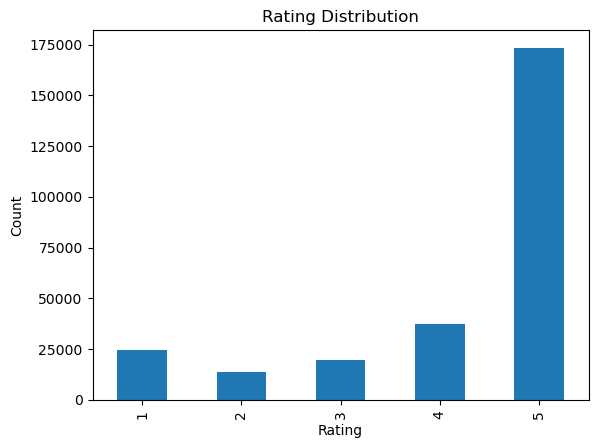

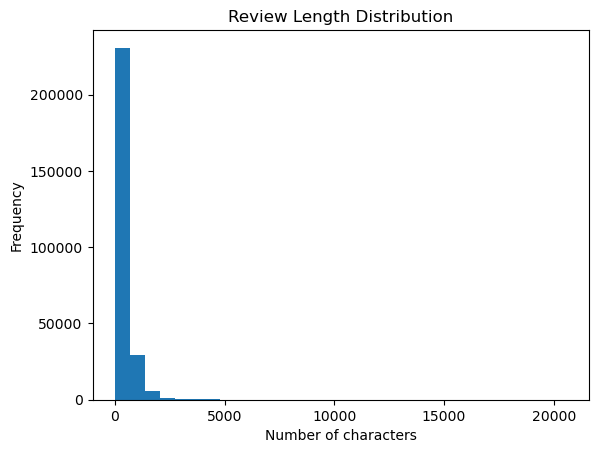

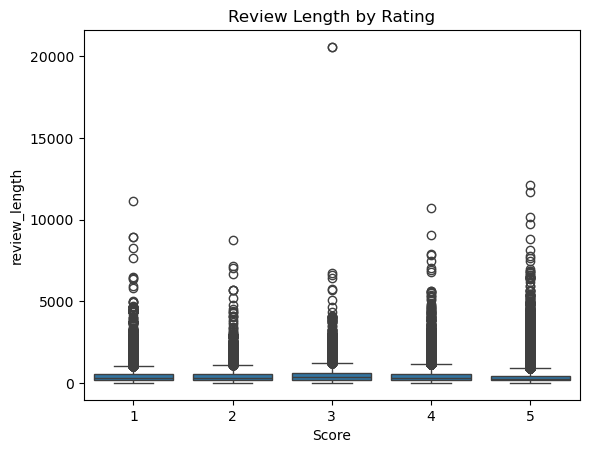

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for rating distribution
df['Score'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Histogram of review lengths
df['review_length'].plot(kind='hist', bins=30, title='Review Length Distribution')
plt.xlabel('Number of characters')
plt.show()

# Boxplot for review lengths by rating
sns.boxplot(x='Score', y='review_length', data=df)
plt.title('Review Length by Rating')
plt.show()


In [8]:
# Example: Imbalance (take 1000 of rating 5, 200 of rating 1, etc.)
imbalanced_df = pd.concat([
    df[df['Score'] == 5].sample(n=1000, random_state=42, replace=True),
    df[df['Score'] == 4].sample(n=500, random_state=42, replace=True),
    df[df['Score'] == 3].sample(n=300, random_state=42, replace=True),
    df[df['Score'] == 2].sample(n=200, random_state=42, replace=True),
    df[df['Score'] == 1].sample(n=100, random_state=42, replace=True)
])

print(imbalanced_df['Score'].value_counts())
imbalanced_df.to_csv('data/cleaned_dataset/imbalanced_data.csv', index=False)


Score
5    1000
4     500
3     300
2     200
1     100
Name: count, dtype: int64


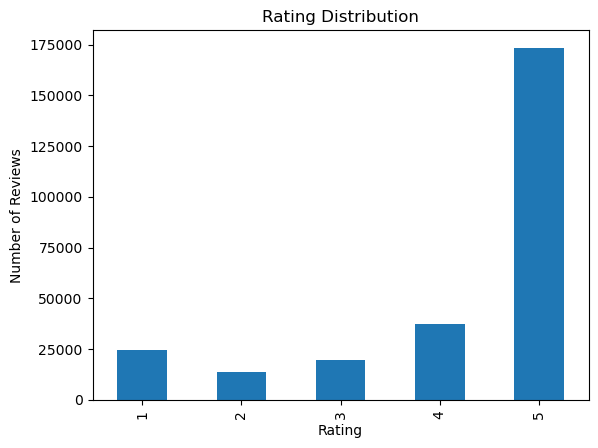

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')
df = pd.read_csv('data/Day3 Data/Reviews-2.csv')
df = pd.read_csv('data/Day3 Data/Reviews-3.csv')
df = pd.read_csv('data/Day3 Data/Reviews-4.csv')


# Bar chart showing the count for each rating
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating Distribution')
plt.show()


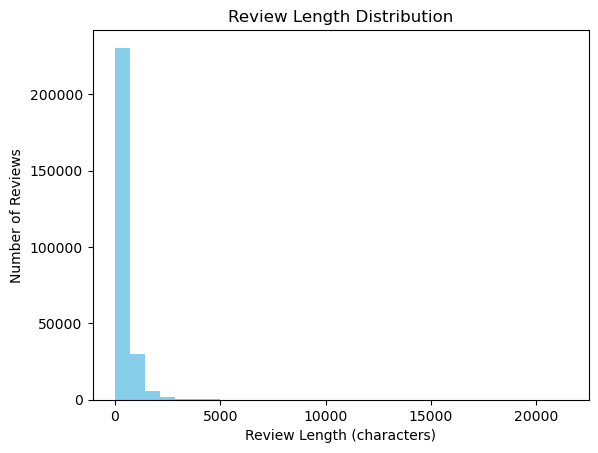

In [10]:
# Add a column for text length if you haven't already
df['review_length'] = df['Text'].str.len()

# Histogram of review lengths
df['review_length'].plot(kind='hist', bins=30, color='skyblue')
plt.xlabel('Review Length (characters)')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution')
plt.show()


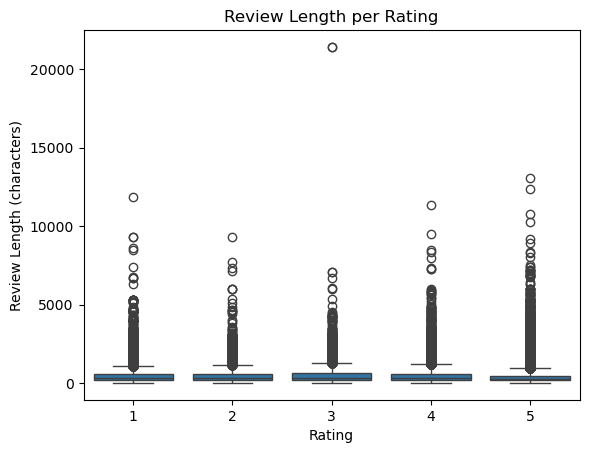

In [11]:
import seaborn as sns

# Boxplot to see how review length varies across ratings
sns.boxplot(x='Score', y='review_length', data=df)
plt.title('Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()


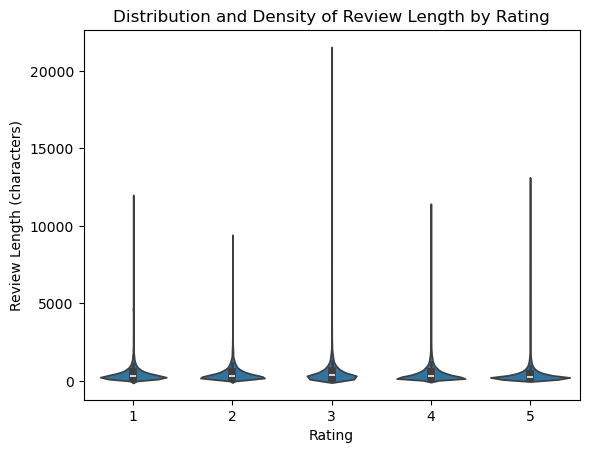

In [12]:
# Violin plots provide more detail on spread/density
sns.violinplot(x='Score', y='review_length', data=df, inner='box')
plt.title('Distribution and Density of Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()


In [14]:
from collections import Counter
import itertools

# Optional: install nltk if not already installed
# !pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=10):
    all_words = list(itertools.chain(*[t.split() for t in texts]))
    filtered_words = [w for w in all_words if w not in stop_words]
    return Counter(filtered_words).most_common(n)

# Example: Top 10 words for each rating
for Score in sorted(df['Score'].unique()):
    texts = df[df['Score'] == Score]['Text']
    print(f"Top words for rating {Score}:")
    print(get_top_words(texts, n=10))
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words for rating 1:
[('I', 68789), ('/><br', 12090), ('like', 11061), ('The', 9235), ('would', 7450), ('product', 7038), ('one', 6475), ('It', 6076), ('taste', 6070), ('This', 5857)]

Top words for rating 2:
[('I', 40385), ('like', 7877), ('/><br', 6875), ('The', 5902), ('taste', 4616), ('would', 4302), ('It', 3499), ('product', 3453), ('one', 3378), ('good', 2996)]

Top words for rating 3:
[('I', 56931), ('/><br', 11939), ('like', 10709), ('The', 8596), ('would', 6665), ('taste', 6357), ('good', 5780), ('It', 5062), ('one', 5058), ('coffee', 4882)]

Top words for rating 4:
[('I', 97054), ('/><br', 21627), ('like', 19335), ('The', 15474), ('good', 13244), ('one', 10089), ('It', 10031), ('would', 9971), ('taste', 9693), ('This', 9159)]

Top words for rating 5:
[('I', 386354), ('/><br', 64928), ('like', 60305), ('The', 49731), ('This', 43768), ('It', 39402), ('great', 38997), ('one', 38652), ('good', 38439), ('love', 38258)]



In [15]:
# Target 
target_n = 2000  # or adjust based on your available data

balanced_df = (
    df.groupby('Score', group_keys=False)
    .apply(lambda x: x.sample(n=target_n, random_state=42, replace=True))
)

print(balanced_df['Score'].value_counts())  # Should show 2000 per rating

# Save balanced dataset
balanced_df.to_csv('data/cleaned_dataset/balanced_data.csv', index=False)


Score
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_5404\2116485022.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_n, random_state=42, replace=True))


In [16]:
total_samples = 2000 

class_dist = {
    1: 0.10,
    2: 0.15,
    3: 0.25,
    4: 0.30,
    5: 0.20
}

samples_per_class = {Score: int(total_samples * pct) for Score, pct in class_dist.items()}
print(samples_per_class)



{1: 200, 2: 300, 3: 500, 4: 600, 5: 400}


In [19]:
imbalanced_df = pd.concat([
    df[df['Score'] == Score].sample(
        n=n_samples, 
        random_state=42, 
        replace=(len(df[df['Score'] == Score]) < n_samples)  # Allows repeat if not enough data for a class
    )
    for Score, n_samples in samples_per_class.items()
    
])


In [20]:
imbalanced_df = imbalanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
imbalanced_df.to_csv('data/cleaned_dataset/my_imbalanced_data.csv', index=False)


In [21]:
print(imbalanced_df['Score'].value_counts())


Score
4    600
3    500
5    400
2    300
1    200
Name: count, dtype: int64


In [22]:
distribution = imbalanced_df['Score'].value_counts(normalize=True).sort_index() * 100
print(distribution)


Score
1    10.0
2    15.0
3    25.0
4    30.0
5    20.0
Name: proportion, dtype: float64


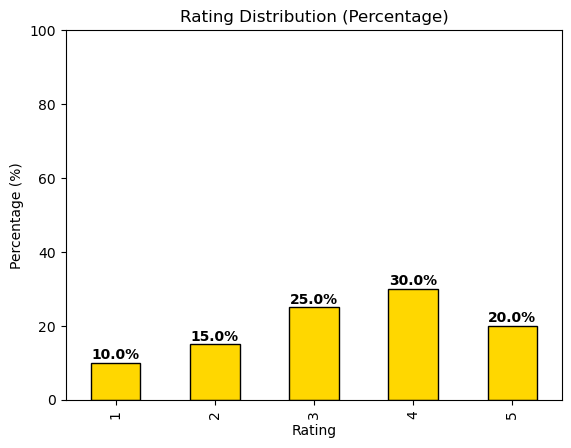

In [23]:
import matplotlib.pyplot as plt

distribution.plot(kind='bar', color='gold', edgecolor='black')
plt.title("Rating Distribution (Percentage)")
plt.xlabel("Rating")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Annotate with values
for i, v in enumerate(distribution):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()
